In [1]:
import gtsam
from gtsam.utils import plot
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [8]:

# load an initial graph and reconstructing it(using direct function here)
graph, initial = gtsam.readG2o('sphere.g2o', is3D = True)

print(graph)

# Defining Prior on the pose having index (key) = 0
priorModel = gtsam.noiseModel.Diagonal.Sigmas(np.array([1e-6, 1e-6, 1e-6, 1e-4, 1e-4, 1e-4]))

# adding the prior factor to avoid gauge problem 
graph.add(gtsam.PriorFactorPose3(0, gtsam.Pose3(), priorModel))

# Defining params for insering in the optimizer
params = gtsam.GaussNewtonParams()   ## the paramters need to be initialized but since 
                                     ## nothing is mentioned in the question we use the predeined parameters in the python wrapper

                                    ## Example of params for regulating optimizer
                                    # params.setRelativeErrorTol(-1e+20)
                                    # params.setAbsoluteErrorTol(-1e+20)
                                    # params.setMaxIterations(10)

# Defining Optimizer
optimizer = gtsam.GaussNewtonOptimizer(graph, initial, params)

# Optimizing
result = optimizer.optimize()
print("Optimization complete")
print("initial error = ", graph.error(initial))
print("final error = ", graph.error(result))


# Extracting poses for plotting
resultPoses = gtsam.utilities.extractPose3(result)
InitialPoses = gtsam.utilities.extractPose3(initial)


NonlinearFactorGraph: size: 9799

Factor 0: BetweenFactor(0,1)
  measured:  R: [
	0.999989, -0.00477484, -0.000197618;
	0.00471134, 0.991933, -0.126675;
	0.000800874, 0.126672, 0.991944
]
t: -0.0187953  0.0328449  -0.125146
  noise model: diagonal sigmas [0.005; 0.005; 0.005; 0.01; 0.01; 0.01];

Factor 1: BetweenFactor(1,2)
  measured:  R: [
	0.999994157, -0.00330662954, -0.000867421075;
	0.00316974115, 0.991902316, -0.126963568;
	0.00128021846, 0.126960077, 0.991907002
]
t: -0.00836587   0.0518559   -0.141405
  noise model: diagonal sigmas [0.005; 0.005; 0.005; 0.01; 0.01; 0.01];

Factor 2: BetweenFactor(2,3)
  measured:  R: [
	0.999916505, 0.00502906071, 0.0119034514;
	-0.00349631823, 0.992093928, -0.125448849;
	-0.0124402318, 0.125396757, 0.992028676
]
t: 0.0116518 0.0646362 -0.123843
  noise model: diagonal sigmas [0.005; 0.005; 0.005; 0.01; 0.01; 0.01];

Factor 3: BetweenFactor(3,4)
  measured:  R: [
	0.999834627, -0.0156601117, -0.00924548951;
	0.0143031272, 0.991143007, -0.13202

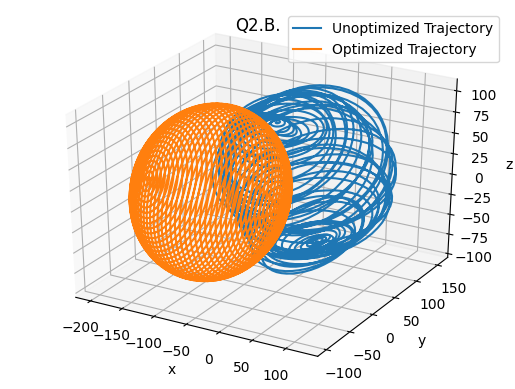

In [7]:
# Plotting the initial and results as Unoptimized and Optimized Trajectory respectively
ax = plt.axes(projection='3d')
ax.plot3D(InitialPoses[:,9], InitialPoses[:,10], InitialPoses[:,11], label="Unoptimized Trajectory")
ax.plot3D(resultPoses[:,9], resultPoses[:,10], resultPoses[:,11], label="Optimized Trajectory")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend(loc='upper right')
plt.title('Q2.B.')
plt.show()